# [1] Notebook setup

## [1.1] Imports

In [1]:
# system
import os
import sys
abs_path = os.path.abspath(path=os.path.dirname(p="."))
abs_path = os.path.join(os.sep, *abs_path.split(sep=os.sep)[:-2])
sys.path.append(abs_path)
sys.path.append(os.path.join(abs_path, "lib"))

# model
from lib.utils import FaceRecognitionModel, FaceSwapModel

# data
import numpy as np
from pathlib import Path

# visualization
from PIL import Image
import matplotlib.pyplot as plt

## [1.2] Instanciating model

In [2]:
face_rocognition = FaceRecognitionModel()
face_swap = FaceSwapModel(abs_filepath=abs_path)

# [2] Images

In [11]:
image_path_list = list(Path(os.path.join(abs_path, "app", "images")).rglob(pattern="*.jpg"))
print(f"{len(image_path_list)=}")

len(image_path_list)=8


In [12]:
def load_image(image_path: str | Path) -> Image.Image:
    with Image.open(fp=image_path, mode="r") as pil_img:
        return pil_img.convert(mode="RGB").copy()

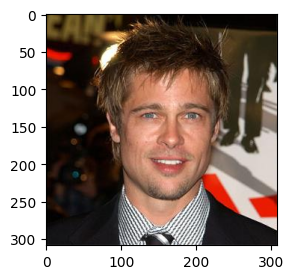

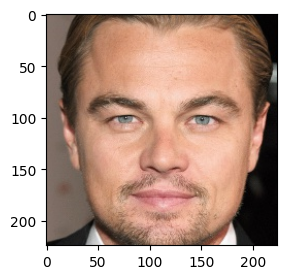

In [13]:
index_1 = 5
index_2 = 3

curr_img_1 = load_image(image_path=image_path_list[index_1]).rotate(angle=0)
curr_img_2 = load_image(image_path=image_path_list[index_2])

plt.figure(figsize=(3,3))
plt.imshow(X=np.asarray(a=curr_img_1))
plt.show()

plt.figure(figsize=(3,3))
plt.imshow(X=np.asarray(a=curr_img_2))
plt.show()

## [2.1] Inference

In [14]:
landmarks_1 = face_rocognition(image=curr_img_1)
landmarks_2 = face_rocognition(image=curr_img_2)

I0000 00:00:1713891258.574919  151865 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1713891258.651893  152707 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.171.04), renderer: NVIDIA GeForce GTX 1650/PCIe/SSE2
W0000 00:00:1713891258.652209  151865 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
I0000 00:00:1713891258.736084  151865 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1713891258.825661  152729 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 535.171.04), renderer: NVIDIA GeForce GTX 1650/PCIe/SSE2
W0000 00:00:1713891258.826046  151865 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.


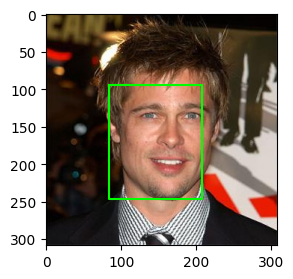

In [15]:
box_1 = landmarks_1.get("box")

plt.figure(figsize=(3,3))
plt.imshow(X=np.asarray(a=curr_img_1))
plt.plot(
    [box_1[0], box_1[2], box_1[2], box_1[0], box_1[0]],
    [box_1[1], box_1[1], box_1[3], box_1[3], box_1[1]],
    color="lime"
)
plt.show()

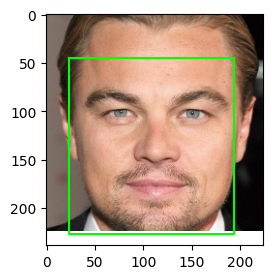

In [16]:
box_2 = landmarks_2.get("box")

plt.figure(figsize=(3,3))
plt.imshow(X=np.asarray(a=curr_img_2))
plt.plot(
    [box_2[0], box_2[2], box_2[2], box_2[0], box_2[0]],
    [box_2[1], box_2[1], box_2[3], box_2[3], box_2[1]],
    color="lime"
)
plt.show()

In [17]:
swap = face_swap(src=curr_img_1, tgt=curr_img_2, src_box=box_1, tgt_box=box_2)

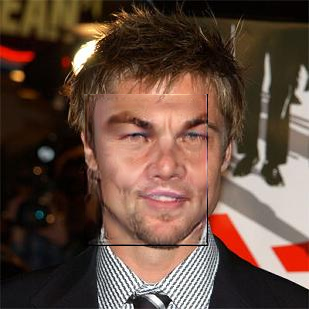

In [18]:
swap